## 1. Upload & Read Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('abalone.data', header=None)
df.head()

Saving abalone.data to abalone.data


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 2. Lihat Data Bagian Akhir

In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


## 3. Statistik Deskriptif

In [ ]:
df.describe()

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## 4. Cek Missing Value

In [ ]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


## 5. Distribusi Target (Umur = Rings + 1.5)

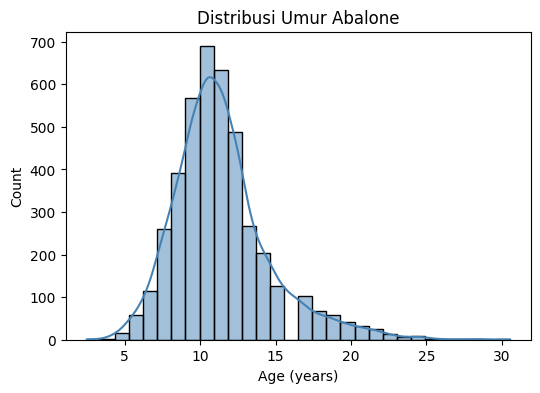

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_y = df.iloc[:, 8] + 1.5

plt.figure(figsize=(6,4))
sns.histplot(df_y, bins=30, kde=True, color="steelblue")
plt.title("Distribusi Umur Abalone")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

## 6. Distribusi Kategori Sex

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x=df.iloc[:,0], hue=df.iloc[:,0], palette="Set2", legend=False)
plt.title("Distribusi Sex Abalone")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

NameError: name 'plt' is not defined

## 7. Heatmap Korelasi Fitur Numerik

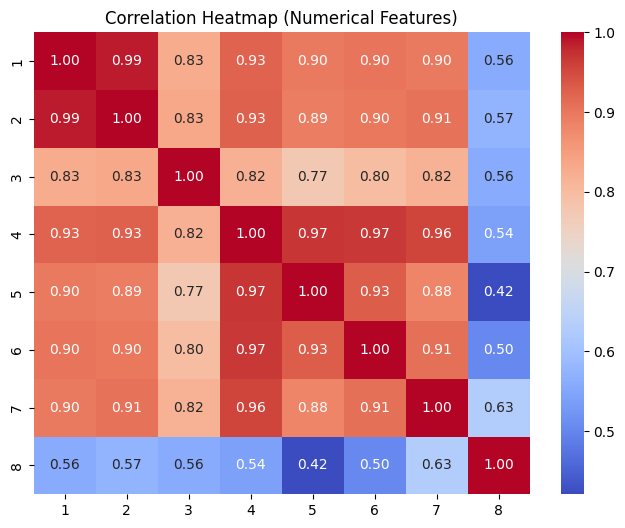

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

## 8. Scatterplot: Length vs Age (berdasarkan Sex)

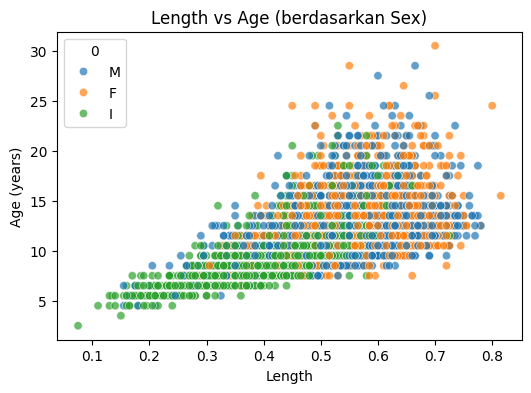

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df.iloc[:,1], y=df_y, hue=df.iloc[:,0], alpha=0.7)
plt.title("Length vs Age (berdasarkan Sex)")
plt.xlabel("Length")
plt.ylabel("Age (years)")
plt.show()

## 9. Pisahkan Fitur & Target

In [ ]:
df_X = df.iloc[:, 0:8]
df_y = df.iloc[:, 8] + 1.5

cats = df_X.select_dtypes(include=['object', 'bool']).columns
print("Kolom kategorikal:", cats)

Kolom kategorikal: Index([0], dtype='int64')


## 10. Preprocessing + Training Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# memisahkan input (0–7) dan output (kolom 8)
df_X = df.iloc[:, 0:8]
df_y = df.iloc[:, 8] + 1.5

# one-hot encoding untuk kolom kategorikal (kolom 0 = Sex)
df_X = pd.get_dummies(df_X, columns=[0], prefix="Sex")

# ubah ke numpy array
X = df_X.values
y = df_y.values

# split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# random forest regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

print('Coef of determination training :', rf.score(X_train, y_train))
print('Coef of determination testing :', rf.score(X_test, y_test))

# prediksi vs real value
print('\nPrediction')
y_pred = rf.predict(X_test)
print(y_pred[:10])
print('Real Value')
print(y_test[:10])

Coef of determination training : 0.9353101070655542
Coef of determination testing : 0.5261397779236787

Prediction
[13.9  10.8  16.1  12.67 14.24 11.8  10.26 10.57  8.62 11.75]
Real Value
[10.5  9.5 17.5 10.5 15.5 12.5  8.5  7.5  8.5 11.5]


## 11. Evaluasi Model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('mse :', mse)
print('rmse : ', rmse)
print('r2 :', r2)

mse : 4.811840829346092
rmse :  2.1935908527676924
r2 : 0.5261397779236787


## 12. Cross Validation (CV)

In [ ]:
from sklearn.model_selection import cross_val_score

# dibagi jadi 5 bagian CV untuk skor R2
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross validation R2 per bagian:", scores)
print("Cross validation R2 mean:", scores.mean())

Cross validation R2 per bagian: [0.44272355 0.26968138 0.51732062 0.5340517  0.46202523]
Cross validation R2 mean: 0.445160495183727


## 13. Tuning + CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

# randomized search pake 5 bagian CV
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV R2:", random_search.best_score_)

# prediksi model setelah tuning
best_rf = random_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

print("\nPrediksi dengan Tuned Model")
print("Prediction :", y_pred_tuned[:10])
print("Real value :", y_test[:10])

# evaluasi model setelah tuning
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nEvaluation pada Data Test dengan Tuned Model")
print("MSE :", mse_tuned)
print("RMSE:", rmse_tuned)
print("R2  :", r2_tuned)

Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Best CV R2: 0.5644777647665412

Prediksi dengan Tuned Model
Prediction : [14.1167523  11.10841479 16.63055986 12.68187683 13.82665813 11.96250311
 10.51775842 10.21604179  8.54658573 11.91577875]
Real value : [10.5  9.5 17.5 10.5 15.5 12.5  8.5  7.5  8.5 11.5]

Evaluation pada Data Test dengan Tuned Model
MSE : 4.567131084997185
RMSE: 2.1370847163828546
R2  : 0.5502382919672473


## 14. Visualisasi Prediksi vs Nilai Asli (Tuned Model)

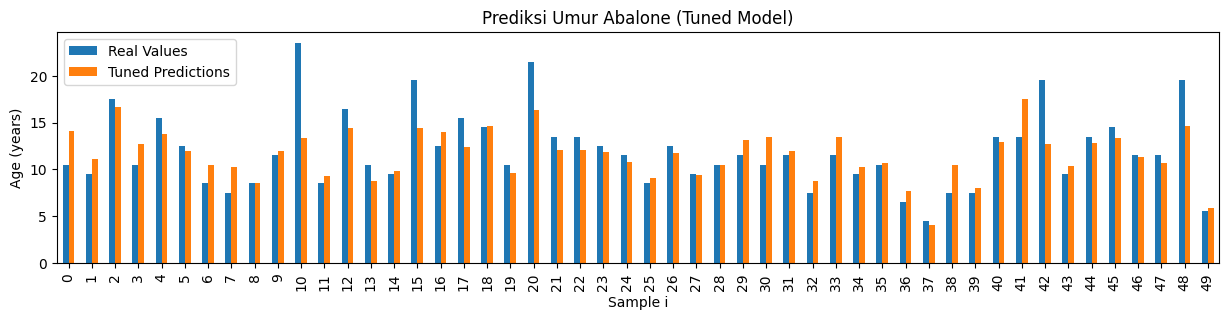

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data1 = pd.Series(y_test[:50].ravel())
data2 = pd.Series(y_pred_tuned[:50].ravel())

df_new = pd.concat([data1, data2], keys=['Real Values', 'Tuned Predictions'], axis=1)
df_new.plot(kind='bar', figsize=(15,3))

plt.title('Prediksi Umur Abalone (Tuned Model)')
plt.xlabel('Sample i')
plt.ylabel('Age (years)')
plt.show()

## 15. Feature Importance (Tuned Model)

Feature Importances (Tuned Model)
7        0.289788
5        0.145516
3        0.137279
4        0.123005
2        0.103503
6        0.103457
1        0.063979
Sex_I    0.019830
Sex_F    0.007993
Sex_M    0.005649
dtype: float64


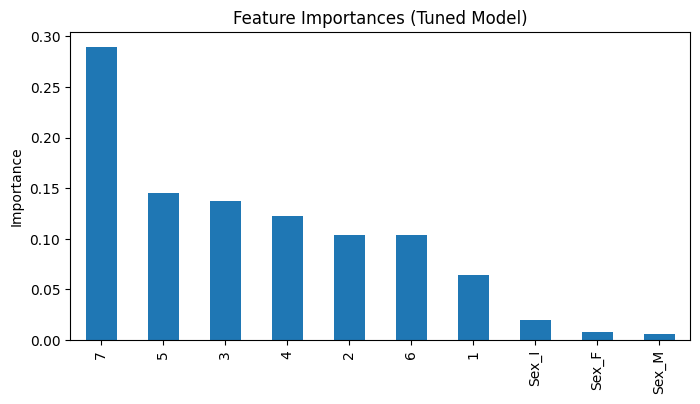

In [ ]:
importances = best_rf.feature_importances_
feature_names = df_X.columns

fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances (Tuned Model)")
print(fi)

plt.figure(figsize=(8,4))
fi.plot(kind='bar')
plt.title("Feature Importances (Tuned Model)")
plt.ylabel("Importance")
plt.show()